# in progress jun 24 2024

need to create the simulated data first of just two compartments...

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as pl
%matplotlib inline
import csv

import scipy.optimize as op
import scipy.stats
from scipy.optimize import curve_fit
import scipy.io
from scipy.stats import rice

import random
import pickle
import seaborn as sns

import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats, wilcoxon,ttest_rel, pearsonr,shapiro,f_oneway, ranksums
from scipy.special import stdtr
import csv
import pandas as pd

from scipy.integrate import quad
import sys 
import os
#sys.path.append(os.path.abspath("/Users/neuroimaging/Desktop/MR-code/Python_Code"))

#from ML_UsefulFunctions import *
#from KidneyROIAnalyses import *

from scipy import special

from scipy.integrate import tplquad

pd.options.display.float_format = '{:.3f}'.format


from sklearn.feature_selection import SequentialFeatureSelector

import warnings
warnings.simplefilter("ignore")

from sklearn.metrics import r2_score


from EllipsoidalSimulationCode import *

from statistics import mean

def func(x,m,b):
    return m*x + b

In [2]:
fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/MultiExpSimulatedCurves_20240624.xlsx'
df_True = pd.read_excel(fileloc,sheet_name = 'TrueData') 

df_TrueParams = pd.read_excel(fileloc,sheet_name = 'Parameters') 
df_AveragedNoise = pd.read_excel(fileloc,sheet_name = 'AveragedNoise') 
#Truth=Truth.rename(columns={c: 'True '+c for c in Truth.columns if c not in ['Run Number', 'Unnamed']})

b_values11 = np.array([0,10,30,50,80,120,200,400,800])#, 1100, 1380]) # medium range 11 b values 0 - 1380


In [3]:
# trying tri-exp fit to the df_True
TrueFracs = []
TrueDiffs = []
FitFracs = []
FitDiffs = []
for j in range(500):
    #norm = df_TrueParams['true fast fraction'].iloc[j]+df_TrueParams['true med fraction'].iloc[j]+df_TrueParams['true slow fraction'].iloc[j]
    #pl.plot(b_values11,df_True.iloc[j,1:]/norm)
    #pl.scatter(b_values11,triexp_func(b_values11, df_TrueParams['true fast fraction'].iloc[j],df_TrueParams['true med fraction'].iloc[j],df_TrueParams['true slow fraction'].iloc[j],df_TrueParams['true fast diffusion'].iloc[j],df_TrueParams['true med diffusion'].iloc[j],df_TrueParams['true slow diffusion'].iloc[j]))
    try:
        popt, pcov = curve_fit(triexp_func, b_values11,df_True.iloc[j,2:-2],p0=[.1,.2,.7, 0.1, 0.01, 0.001],bounds=(0, [1,1,1,.1,.1,.1]),maxfev=10000)
        #pl.scatter(b_values11,triexp_func(b_values11,*popt))
    except:
        popt = np.array([0.0,0.0,0.0,0.0,0.0,0.0])
    
    ## order popt from fast to slow diffusion
    # also set any nan to zero..
    #popt[np.isnan(popt)] = 0.0
    
    norm_popt = popt[0]+popt[1]+popt[2]
    if norm_popt == 0:
        fracs = np.array([0,0,0])
        diffusions = np.array([0,0,0])
    else:
        idx_sort = popt[3:6].argsort()
        fracs = popt[0:3]/norm_popt
        diffusions = popt[3:6]
        fracs=fracs[idx_sort[::-1]]
        diffusions=diffusions[idx_sort[::-1]]
    #print(*[df_TrueParams['true fast fraction'].iloc[j],df_TrueParams['true med fraction'].iloc[j],df_TrueParams['true slow fraction'].iloc[j],df_TrueParams['true fast diffusion'].iloc[j],df_TrueParams['true med diffusion'].iloc[j],df_TrueParams['true slow diffusion'].iloc[j]])
    
    ## order given true values from fast to slow just in case
    givenfracs = np.array([df_TrueParams['true fast fraction'].iloc[j],df_TrueParams['true med fraction'].iloc[j],df_TrueParams['true slow fraction'].iloc[j]])
    givendiffusions = np.array([df_TrueParams['true fast diffusion'].iloc[j],df_TrueParams['true med diffusion'].iloc[j],df_TrueParams['true slow diffusion'].iloc[j]])
    idx_sort = givendiffusions.argsort()
    givenfracs = givenfracs[idx_sort[::-1]]
    givendiffusions = givendiffusions[idx_sort[::-1]]

    TrueFracs.append(list(givenfracs))
    TrueDiffs.append(list(givendiffusions))
    FitFracs.append(list(fracs))
    FitDiffs.append(list(diffusions))
    

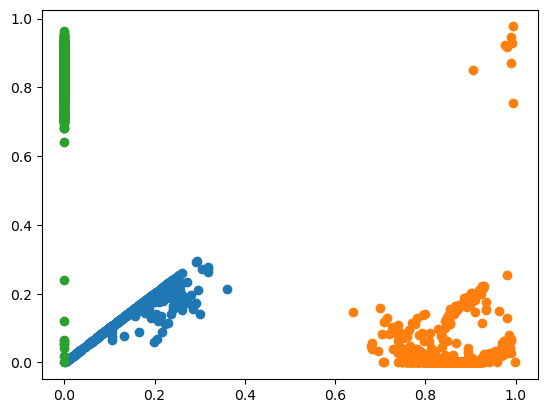

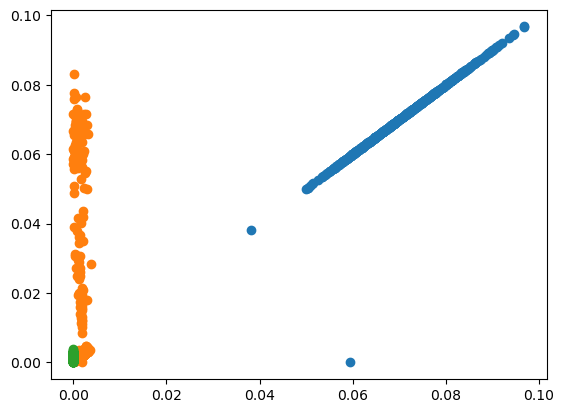

In [4]:

pl.scatter(np.array(TrueFracs)[:,0],np.array(FitFracs)[:,0],label= 'fast frac')

pl.scatter(np.array(TrueFracs)[:,1],np.array(FitFracs)[:,1], label = 'med frac')
pl.scatter(np.array(TrueFracs)[:,2],np.array(FitFracs)[:,2], label = 'slow frac')
pl.show()

pl.scatter(np.array(TrueDiffs)[:,0],np.array(FitDiffs)[:,0],label= 'fast diffs')
pl.scatter(np.array(TrueDiffs)[:,1],np.array(FitDiffs)[:,1], label = 'med diffs')
pl.scatter(np.array(TrueDiffs)[:,2],np.array(FitDiffs)[:,2], label = 'slow diffs')
pl.show()




# combined fD isotropic no noise

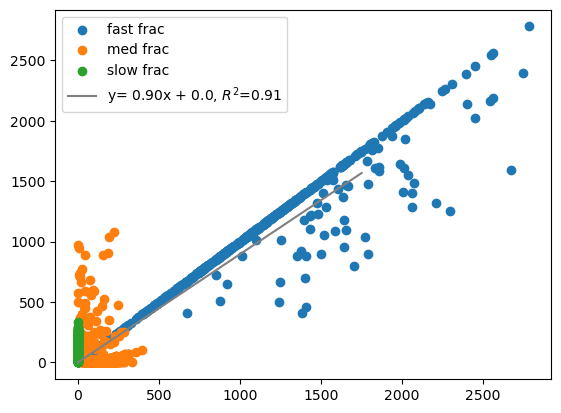

SignificanceResult(statistic=0.5067362514333643, pvalue=1.187699394949523e-98)
All fD difference = -0.00000 ± 0.00162, nan%
fast fD mean difference = -0.45450± 1.47774, 0.00000%
med fD mean difference = -0.78905± 1.71831, -99.99992%
slow fD mean difference = 1.23967± 0.57970, nan%


In [5]:
TruefastfDs= 1000*np.array(TrueFracs)[:,0]*np.array(TrueDiffs)[:,0]
FitfastfDs = 1000*np.array(FitFracs)[:,0]*np.array(FitDiffs)[:,0]

TruemedfDs= 1000*np.array(TrueFracs)[:,1]*np.array(TrueDiffs)[:,1]
FitmedfDs = 1000*np.array(FitFracs)[:,1]*np.array(FitDiffs)[:,1]

TrueslowfDs= 1000*np.array(TrueFracs)[:,2]*np.array(TrueDiffs)[:,2]
FitslowfDs = 1000*np.array(FitFracs)[:,2]*np.array(FitDiffs)[:,2]


pl.scatter(112500*np.array(TrueFracs)[:,0]*np.array(TrueDiffs)[:,0], 112500*np.array(FitFracs)[:,0]*np.array(FitDiffs)[:,0],label= 'fast frac')
pl.scatter(112500*np.array(TrueFracs)[:,1]*np.array(TrueDiffs)[:,1], 112500*np.array(FitFracs)[:,1]*np.array(FitDiffs)[:,1],label= 'med frac')
pl.scatter(112500*np.array(TrueFracs)[:,2]*np.array(TrueDiffs)[:,2], 112500*np.array(FitFracs)[:,2]*np.array(FitDiffs)[:,2],label= 'slow frac')

x = np.linspace(0,1750,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress((np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1), (np.array(FitFracs)*np.array(FitDiffs)).reshape(-1))
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()
print(scipy.stats.spearmanr((np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1), (np.array(FitFracs)*np.array(FitDiffs)).reshape(-1)))
print(f'All fD difference = {np.mean((np.array(FitFracs)*np.array(FitDiffs)).reshape(-1)-(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1)):.5f} ± {np.std((np.array(FitFracs)*np.array(FitDiffs)).reshape(-1)-(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1)):.5f}, {100*np.median(((np.array(FitFracs)*np.array(FitDiffs)).reshape(-1)-(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1))/(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1)):.5f}%')
print(f'fast fD mean difference = {np.mean(FitfastfDs-TruefastfDs):.5f}± {np.std(FitfastfDs-TruefastfDs):.5f}, {100*np.median((FitfastfDs-TruefastfDs)/TruefastfDs):.5f}%')
print(f'med fD mean difference = {np.mean(FitmedfDs-TruemedfDs):.5f}± {np.std(FitmedfDs-TruemedfDs):.5f}, {100*np.median((FitmedfDs-TruemedfDs)/TruemedfDs):.5f}%')
print(f'slow fD mean difference = {np.mean(FitslowfDs-TrueslowfDs):.5f}± {np.std(FitslowfDs-TrueslowfDs):.5f}, {100*np.median((FitslowfDs-TrueslowfDs)/TrueslowfDs):.5f}%')


In [6]:
# trying tri-exp fit to the df_True
TrueFracs = []
TrueDiffs = []
FitFracs = []
FitDiffs = []
r2_fit = []
for j in range(500):
    #norm = df_TrueParams['true fast fraction'].iloc[j]+df_TrueParams['true med fraction'].iloc[j]+df_TrueParams['true slow fraction'].iloc[j]
    #pl.plot(b_values11,df_True.iloc[j,1:]/norm)
    #pl.scatter(b_values11,triexp_func(b_values11, df_TrueParams['true fast fraction'].iloc[j],df_TrueParams['true med fraction'].iloc[j],df_TrueParams['true slow fraction'].iloc[j],df_TrueParams['true fast diffusion'].iloc[j],df_TrueParams['true med diffusion'].iloc[j],df_TrueParams['true slow diffusion'].iloc[j]))
    try:
        popt, pcov = curve_fit(triexp_func, b_values11,df_AveragedNoise.iloc[j,2:-2],p0=[.1,.2,.7, 0.1, 0.01, 0.001],bounds=(0, [1,1,1,.1,.1,.1]),maxfev=10000)
        #pl.scatter(b_values11,triexp_func(b_values11,*popt))
    except:
        popt = np.array([0.0,0.0,0.0,0.0,0.0,0.0])
    
    ## order popt from fast to slow diffusion
    # also set any nan to zero..
    #popt[np.isnan(popt)] = 0.0
    
    norm_popt = popt[0]+popt[1]+popt[2]
    if norm_popt == 0:
        fracs = np.array([0,0,0])
        diffusions = np.array([0,0,0])
    else:
        idx_sort = popt[3:6].argsort()
        fracs = popt[0:3]/norm_popt
        diffusions = popt[3:6]
        fracs=fracs[idx_sort[::-1]]
        diffusions=diffusions[idx_sort[::-1]]
    #print(*[df_TrueParams['true fast fraction'].iloc[j],df_TrueParams['true med fraction'].iloc[j],df_TrueParams['true slow fraction'].iloc[j],df_TrueParams['true fast diffusion'].iloc[j],df_TrueParams['true med diffusion'].iloc[j],df_TrueParams['true slow diffusion'].iloc[j]])
    
    ## order given true values from fast to slow just in case
    givenfracs = np.array([df_TrueParams['true fast fraction'].iloc[j],df_TrueParams['true med fraction'].iloc[j],df_TrueParams['true slow fraction'].iloc[j]])
    givendiffusions = np.array([df_TrueParams['true fast diffusion'].iloc[j],df_TrueParams['true med diffusion'].iloc[j],df_TrueParams['true slow diffusion'].iloc[j]])
    idx_sort = givendiffusions.argsort()
    givenfracs = givenfracs[idx_sort[::-1]]
    givendiffusions = givendiffusions[idx_sort[::-1]]

    TrueFracs.append(list(givenfracs))
    TrueDiffs.append(list(givendiffusions))
    FitFracs.append(list(fracs))
    FitDiffs.append(list(diffusions))
    
    
    y_pred = triexp_func(b_values11, *popt)
    try:
        r2_goodness = r2_score(df_AveragedNoise.iloc[j,2:-2], y_pred)
    except:
        #if all values are 0, r2 against all zeros.
        #print(j,y_pred)
        r2_goodness = r2_score(df_AveragedNoise.iloc[j,2:-2], np.zeros(9))
        print(r2_goodness)
    r2_fit.append(r2_goodness)
    
print(f'goodness of fit: r2={np.mean(r2_fit):.5f}±{np.std(r2_fit):.5f}') 


-28.103739941689938
-15.10611131872939
-7.793758373799427
-21.40748669498917
-7.271408579663683
-10.983715461690302
goodness of fit: r2=0.79999±1.93804


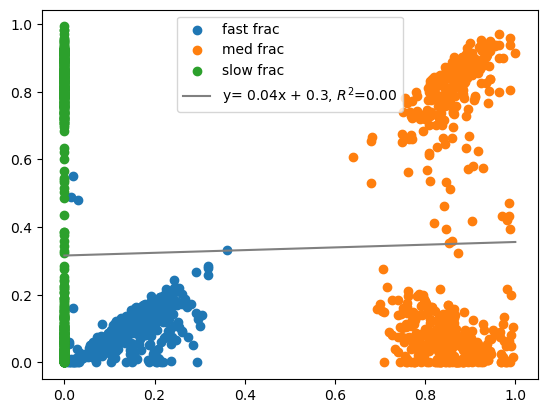

SignificanceResult(statistic=-0.07593126398689273, pvalue=0.003254661023432495)
fast frac mean difference = -0.04272± 0.06243, -10.80869
med frac mean difference = -0.47621± 0.36487, -55.80062
slow frac mean difference = 0.50693± 0.37839, nan


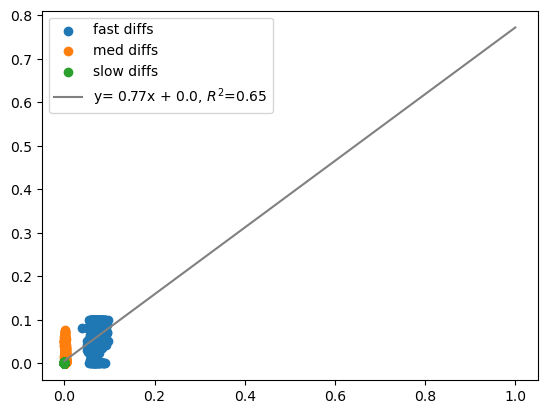

SignificanceResult(statistic=0.8004474330832688, pvalue=0.0)
fast diffusion mean difference = -0.01055± 0.02565, -14.78190
med diffusion mean difference = 0.01055± 0.01866, 3060.69531
slow diffusion mean difference = 0.00087± 0.00080, nan


In [7]:

pl.scatter(np.array(TrueFracs)[:,0],np.array(FitFracs)[:,0],label= 'fast frac')
pl.scatter(np.array(TrueFracs)[:,1],np.array(FitFracs)[:,1], label = 'med frac')
pl.scatter(np.array(TrueFracs)[:,2],np.array(FitFracs)[:,2], label = 'slow frac')

x = np.linspace(0,1,10)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.array(TrueFracs).reshape(-1), np.array(FitFracs).reshape(-1))
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()
print(scipy.stats.spearmanr(np.array(TrueFracs).reshape(-1), np.array(FitFracs).reshape(-1)))
print(f'fast frac mean difference = {np.mean(np.array(FitFracs)[:,0]-np.array(TrueFracs)[:,0]):.5f}± {np.std(np.array(TrueFracs)[:,0]-np.array(FitFracs)[:,0]):.5f}, {100*np.mean((np.array(FitFracs)[:,0]-np.array(TrueFracs)[:,0])/np.array(TrueFracs)[:,0]):.5f}')
print(f'med frac mean difference = {np.mean(np.array(FitFracs)[:,1]-np.array(TrueFracs)[:,1]):.5f}± {np.std(np.array(TrueFracs)[:,1]-np.array(FitFracs)[:,1]):.5f}, {100*np.mean((np.array(FitFracs)[:,1]-np.array(TrueFracs)[:,1])/np.array(TrueFracs)[:,1]):.5f}')
print(f'slow frac mean difference = {np.mean(np.array(FitFracs)[:,2]-np.array(TrueFracs)[:,2]):.5f}± {np.std(np.array(TrueFracs)[:,2]-np.array(FitFracs)[:,2]):.5f}, {100*np.mean((np.array(FitFracs)[:,2]-np.array(TrueFracs)[:,2])/np.array(TrueFracs)[:,2]):.5f}')



pl.scatter(np.array(TrueDiffs)[:,0],np.array(FitDiffs)[:,0],label= 'fast diffs')
pl.scatter(np.array(TrueDiffs)[:,1],np.array(FitDiffs)[:,1], label = 'med diffs')
pl.scatter(np.array(TrueDiffs)[:,2],np.array(FitDiffs)[:,2], label = 'slow diffs')
x = np.linspace(0,1,10)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.array(TrueDiffs).reshape(-1), np.array(FitDiffs).reshape(-1))
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()
print(scipy.stats.spearmanr(np.array(TrueDiffs).reshape(-1), np.array(FitDiffs).reshape(-1)))
print(f'fast diffusion mean difference = {np.mean(np.array(FitDiffs)[:,0]-np.array(TrueDiffs)[:,0]):.5f}± {np.std(np.array(TrueDiffs)[:,0]-np.array(FitDiffs)[:,0]):.5f}, {100*np.mean((np.array(FitDiffs)[:,0]-np.array(TrueDiffs)[:,0])/np.array(TrueDiffs)[:,0]):.5f}')
print(f'med diffusion mean difference = {np.mean(np.array(FitDiffs)[:,1]-np.array(TrueDiffs)[:,1]):.5f}± {np.std(np.array(TrueDiffs)[:,1]-np.array(FitDiffs)[:,1]):.5f}, {100*np.mean((np.array(FitDiffs)[:,1]-np.array(TrueDiffs)[:,1])/np.array(TrueDiffs)[:,1]):.5f}')
print(f'slow diffusion mean difference = {np.mean(np.array(FitDiffs)[:,2]-np.array(TrueDiffs)[:,2]):.5f}± {np.std(np.array(TrueDiffs)[:,2]-np.array(FitDiffs)[:,2]):.5f}, {100*np.mean((np.array(FitDiffs)[:,2]-np.array(TrueDiffs)[:,2])/np.array(TrueDiffs)[:,2]):.5f}')



# now combined fD

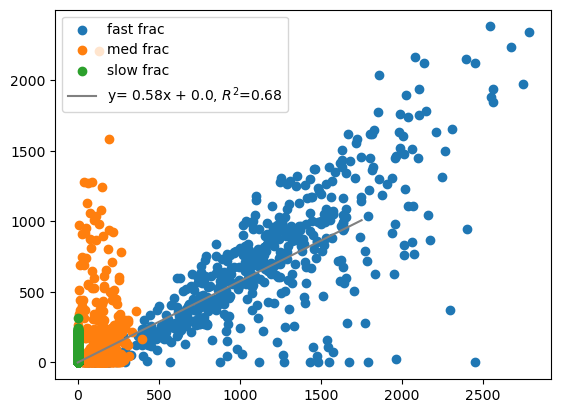

SignificanceResult(statistic=0.7047553741640943, pvalue=1.4027759952653458e-225)
All fD difference = -0.00100 ± 0.00306, nan%
fast fD mean difference = -3.94967± 3.01755, -40.74120%
med fD mean difference = 0.34448± 2.34139, -2.65803%
slow fD mean difference = 0.61281± 0.66437, nan%


In [8]:
TruefastfDs= 1000*np.array(TrueFracs)[:,0]*np.array(TrueDiffs)[:,0]
FitfastfDs = 1000*np.array(FitFracs)[:,0]*np.array(FitDiffs)[:,0]

TruemedfDs= 1000*np.array(TrueFracs)[:,1]*np.array(TrueDiffs)[:,1]
FitmedfDs = 1000*np.array(FitFracs)[:,1]*np.array(FitDiffs)[:,1]

TrueslowfDs= 1000*np.array(TrueFracs)[:,2]*np.array(TrueDiffs)[:,2]
FitslowfDs = 1000*np.array(FitFracs)[:,2]*np.array(FitDiffs)[:,2]


pl.scatter(112500*np.array(TrueFracs)[:,0]*np.array(TrueDiffs)[:,0], 112500*np.array(FitFracs)[:,0]*np.array(FitDiffs)[:,0],label= 'fast frac')
pl.scatter(112500*np.array(TrueFracs)[:,1]*np.array(TrueDiffs)[:,1], 112500*np.array(FitFracs)[:,1]*np.array(FitDiffs)[:,1],label= 'med frac')
pl.scatter(112500*np.array(TrueFracs)[:,2]*np.array(TrueDiffs)[:,2], 112500*np.array(FitFracs)[:,2]*np.array(FitDiffs)[:,2],label= 'slow frac')

x = np.linspace(0,1750,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress((np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1), (np.array(FitFracs)*np.array(FitDiffs)).reshape(-1))
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()
print(scipy.stats.spearmanr((np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1), (np.array(FitFracs)*np.array(FitDiffs)).reshape(-1)))
print(f'All fD difference = {np.mean((np.array(FitFracs)*np.array(FitDiffs)).reshape(-1)-(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1)):.5f} ± {np.std((np.array(FitFracs)*np.array(FitDiffs)).reshape(-1)-(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1)):.5f}, {100*np.median(((np.array(FitFracs)*np.array(FitDiffs)).reshape(-1)-(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1))/(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1)):.5f}%')
print(f'fast fD mean difference = {np.mean(FitfastfDs-TruefastfDs):.5f}± {np.std(FitfastfDs-TruefastfDs):.5f}, {100*np.median((FitfastfDs-TruefastfDs)/TruefastfDs):.5f}%')
print(f'med fD mean difference = {np.mean(FitmedfDs-TruemedfDs):.5f}± {np.std(FitmedfDs-TruemedfDs):.5f}, {100*np.median((FitmedfDs-TruemedfDs)/TruemedfDs):.5f}%')
print(f'slow fD mean difference = {np.mean(FitslowfDs-TrueslowfDs):.5f}± {np.std(FitslowfDs-TrueslowfDs):.5f}, {100*np.median((FitslowfDs-TrueslowfDs)/TrueslowfDs):.5f}%')


# Fitting a false compartment: 

In [28]:
np.count_nonzero(np.array(FitFracs) < 0.01)

129

# two close coefficients

In [48]:
AllN_5=0
AllN_1=0
AllN_10=0
for j in range(len(FitDiffs)):
    dif1=200*np.abs(np.array(FitDiffs)[j,1]-np.array(FitDiffs)[j,2])/(np.array(FitDiffs)[j,1]+np.array(FitDiffs)[j,2])
    dif2=200*np.abs(np.array(FitDiffs)[j,2]-np.array(FitDiffs)[j,0])/(np.array(FitDiffs)[j,2]+np.array(FitDiffs)[j,0])
    dif3=200*np.abs(np.array(FitDiffs)[j,1]-np.array(FitDiffs)[j,0])/(np.array(FitDiffs)[j,1]+np.array(FitDiffs)[j,0])
    if np.abs(min([dif1, dif2, dif3])) < 10:
        #print(np.array(FitDiffs)[j,:])
        #print([dif1, dif2, dif3])
        AllN_10=AllN_10+1
    if np.abs(min([dif1, dif2, dif3])) < 5:
        #print(np.array(FitDiffs)[j,:])
        #print([dif1, dif2, dif3])
        AllN_5=AllN_5+1
    if np.abs(min([dif1, dif2, dif3])) < 1:
        AllN_1=AllN_1+1
print(AllN_10)
print(AllN_5)
print(AllN_1)

221
213
198


# sorting by diffusion coefficient?

In [54]:
a = [1,2,3,4]
b=np.array([])
sum(a[j] for j in b)

0

In [88]:
# trying tri-exp fit to the df_True
TrueFracs = []
TrueDiffs = []
FitFracs = []
FitDiffs = []
r2_fit = []
for j in range(500):
    #norm = df_TrueParams['true fast fraction'].iloc[j]+df_TrueParams['true med fraction'].iloc[j]+df_TrueParams['true slow fraction'].iloc[j]
    #pl.plot(b_values11,df_True.iloc[j,1:]/norm)
    #pl.scatter(b_values11,triexp_func(b_values11, df_TrueParams['true fast fraction'].iloc[j],df_TrueParams['true med fraction'].iloc[j],df_TrueParams['true slow fraction'].iloc[j],df_TrueParams['true fast diffusion'].iloc[j],df_TrueParams['true med diffusion'].iloc[j],df_TrueParams['true slow diffusion'].iloc[j]))
    try:
        popt, pcov = curve_fit(triexp_func, b_values11,df_AveragedNoise.iloc[j,2:-2],p0=[.1,.2,.7, 0.1, 0.01, 0.001],bounds=(0, [1,1,1,.1,.1,.1]),maxfev=10000)
        #pl.scatter(b_values11,triexp_func(b_values11,*popt))
    except:
        popt = np.array([0.0,0.0,0.0,0.0,0.0,0.0])
    
    ## order popt from fast to slow diffusion
    # also set any nan to zero..
    #popt[np.isnan(popt)] = 0.0
    
    norm_popt = popt[0]+popt[1]+popt[2]
    if norm_popt == 0:
        fracs = np.array([0,0,0])
        diffusions = np.array([0,0,0])
    else:
        idx_sort = popt[3:6].argsort()
        fracs = popt[0:3]/norm_popt
        diffusions = popt[3:6]
        fracs=fracs[idx_sort[::-1]]
        diffusions=diffusions[idx_sort[::-1]]
        
        ## sorting by diffusion coefficient
        #tissue
        idxs = np.where(np.logical_and(diffusions<0.005, diffusions>0.0008))[0]
        TissueFrac=sum(fracs[ii] for ii in idxs)
        if len(idxs)>0:
            TissueDiffs = sum(diffusions[ii] for ii in idxs)/(len(idxs))
        else:
            TissueDiffs=0
            
        idxs = np.where(np.logical_and(diffusions>=0.005, diffusions<0.05))[0]
        TubuleFrac=sum(fracs[ii] for ii in idxs)
        #print(TubuleFrac)
        if len(idxs)>0:
            TubuleDiffs = sum(diffusions[ii] for ii in idxs)/(len(idxs))
        else:
            TubuleDiffs=0   
            
        idxs = np.where(np.logical_and(diffusions>=0.05, diffusions>0.05))[0]
        VascFrac=sum(fracs[ii] for ii in idxs)
        if len(idxs)>0:
            VascDiffs = sum(diffusions[ii] for ii in idxs)/(len(idxs))
            #print(VascDiffs)
        else:
            VascDiffs=0
        sortedFracs = [VascFrac, TissueFrac, TubuleFrac] #tubule frac at end because empty
        sortedDiffs = [VascDiffs, TissueDiffs, TubuleDiffs]
        #print(sortedFracs)
    #print(*[df_TrueParams['true fast fraction'].iloc[j],df_TrueParams['true med fraction'].iloc[j],df_TrueParams['true slow fraction'].iloc[j],df_TrueParams['true fast diffusion'].iloc[j],df_TrueParams['true med diffusion'].iloc[j],df_TrueParams['true slow diffusion'].iloc[j]])
    
    ## order given true values from fast to slow just in case
    givenfracs = np.array([df_TrueParams['true fast fraction'].iloc[j],df_TrueParams['true med fraction'].iloc[j],df_TrueParams['true slow fraction'].iloc[j]])
    givendiffusions = np.array([df_TrueParams['true fast diffusion'].iloc[j],df_TrueParams['true med diffusion'].iloc[j],df_TrueParams['true slow diffusion'].iloc[j]])
    idx_sort = givendiffusions.argsort()
    givenfracs = givenfracs[idx_sort[::-1]]
    givendiffusions = givendiffusions[idx_sort[::-1]]

    TrueFracs.append(list(givenfracs))
    TrueDiffs.append(list(givendiffusions))
    #FitFracs.append(list(fracs))
    #FitDiffs.append(list(diffusions))
    FitFracs.append(list(sortedFracs))
    FitDiffs.append(list(sortedDiffs))
    
    y_pred = triexp_func(b_values11, *popt)
    try:
        r2_goodness = r2_score(df_AveragedNoise.iloc[j,2:-2], y_pred)
    except:
        #if all values are 0, r2 against all zeros.
        #print(j,y_pred)
        r2_goodness = r2_score(df_AveragedNoise.iloc[j,2:-2], np.zeros(9))
        print(r2_goodness)
        r2_goodness=0
    r2_fit.append(r2_goodness)
    
print(f'goodness of fit: r2={np.mean(r2_fit):.5f}±{np.std(r2_fit):.5f}') 


-28.103739941689938
-15.10611131872939
-7.793758373799427
-21.40748669498917
-7.271408579663683
-10.983715461690302
goodness of fit: r2=0.98132±0.10896


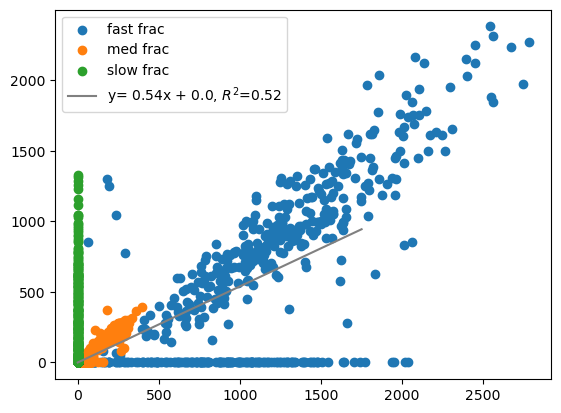

SignificanceResult(statistic=0.4492018855948772, pvalue=2.235693837684995e-75)
All fD difference = -0.00097 ± 0.00366, nan%
fast fD mean difference = -4.45168± 3.72889, -37.72989%
med fD mean difference = -0.12659± 0.26846, -5.62164%
slow fD mean difference = 1.66165± 2.53651, nan%


In [83]:
TruefastfDs= 1000*np.array(TrueFracs)[:,0]*np.array(TrueDiffs)[:,0]
FitfastfDs = 1000*np.array(FitFracs)[:,0]*np.array(FitDiffs)[:,0]

TruemedfDs= 1000*np.array(TrueFracs)[:,1]*np.array(TrueDiffs)[:,1]
FitmedfDs = 1000*np.array(FitFracs)[:,1]*np.array(FitDiffs)[:,1]

TrueslowfDs= 1000*np.array(TrueFracs)[:,2]*np.array(TrueDiffs)[:,2]
FitslowfDs = 1000*np.array(FitFracs)[:,2]*np.array(FitDiffs)[:,2]


pl.scatter(112500*np.array(r2_goodness)[:,0]*np.array(TrueDiffs)[:,0], 112500*np.array(FitFracs)[:,0]*np.array(FitDiffs)[:,0],label= 'fast frac')
pl.scatter(112500*np.array(TrueFracs)[:,1]*np.array(TrueDiffs)[:,1], 112500*np.array(FitFracs)[:,1]*np.array(FitDiffs)[:,1],label= 'med frac')
pl.scatter(112500*np.array(TrueFracs)[:,2]*np.array(TrueDiffs)[:,2], 112500*np.array(FitFracs)[:,2]*np.array(FitDiffs)[:,2],label= 'slow frac')

x = np.linspace(0,1750,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress((np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1), (np.array(FitFracs)*np.array(FitDiffs)).reshape(-1))
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()
print(scipy.stats.spearmanr((np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1), (np.array(FitFracs)*np.array(FitDiffs)).reshape(-1)))
print(f'All fD difference = {np.mean((np.array(FitFracs)*np.array(FitDiffs)).reshape(-1)-(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1)):.5f} ± {np.std((np.array(FitFracs)*np.array(FitDiffs)).reshape(-1)-(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1)):.5f}, {100*np.median(((np.array(FitFracs)*np.array(FitDiffs)).reshape(-1)-(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1))/(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1)):.5f}%')
print(f'fast fD mean difference = {np.mean(FitfastfDs-TruefastfDs):.5f}± {np.std(FitfastfDs-TruefastfDs):.5f}, {100*np.median((FitfastfDs-TruefastfDs)/TruefastfDs):.5f}%')
print(f'med fD mean difference = {np.mean(FitmedfDs-TruemedfDs):.5f}± {np.std(FitmedfDs-TruemedfDs):.5f}, {100*np.median((FitmedfDs-TruemedfDs)/TruemedfDs):.5f}%')
print(f'slow fD mean difference = {np.mean(FitslowfDs-TrueslowfDs):.5f}± {np.std(FitslowfDs-TrueslowfDs):.5f}, {100*np.median((FitslowfDs-TrueslowfDs)/TrueslowfDs):.5f}%')
